# ISA340 Final Project: Predicting NBA Playoff Status Using In-Season Statistics (1995-96 to 2021-22)

## David Bryce, Ryan Giammarco, and Marcus Moody

## May 12, 2022

Disclaimer: This project uses a dataset primarily supplied by basketball reference (make this a liink!). The dataset and all related material are being used for the educational purposes of this project only. All code in this project is inspired by assignments provided by Profesor Tingting Zhao of Bryant University and official documentations provided by several imports.

This code will contain several pieces of important notation within, but will largely not have markdown explaining the rationale behind decisions. A detailed explanation of design choices and why they were made will be supplied in this project's corresponding paper, "Predicting NBA Playoff Status Using In-Season Statistics (1995-96 to 2021-22)," by the same authors.

In [41]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
# upload import
from google.colab import files
# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
# confusion matrix imports
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
#file upload
upload = files.upload()

Saving Modern_NBA_Team_Data.xlsx to Modern_NBA_Team_Data (1).xlsx


In [43]:
#create and display dataframe
df_nba = pd.read_excel("Modern_NBA_Team_Data.xlsx")
df_nba.head(15)
## ADD MAX COLUMNS

,Team,Season,Playoffs,G,MP,T/FG,T/FGA,T/FG%,T/3P,T/3PA,...,O/STL,O/STL/G,O/BLK,O/BLK/G,O/TOV,O/TOV/G,O/PF,O/PF/G,O/PTS,O/PTS/G
0,Chicago Bulls,1995-96,Made Playoffs,82,19730,3293,6892,0.478,544,1349,...,595,7.256098,312,3.804878,1405,17.134146,1856,22.634146,7621,92.939024
1,Seattle SuperSonics,1995-96,Made Playoffs,82,19880,3074,6401,0.480,581,1596,...,758,9.243902,391,4.768293,1517,18.500000,2010,24.512195,7933,96.743902
2,Orlando Magic,1995-96,Made Playoffs,82,19855,3203,6640,0.482,622,1645,...,644,7.853659,324,3.951220,1238,15.097561,1827,22.280488,8115,98.963415
3,Phoenix Suns,1995-96,Made Playoffs,82,19955,3159,6673,0.473,327,984,...,586,7.146341,420,5.121951,1191,14.524390,2011,24.524390,8525,103.963415
4,Boston Celtics,1995-96,Missed Playoffs,82,19905,3163,6942,0.456,539,1453,...,667,8.134146,489,5.963415,1314,16.024390,1965,23.963415,8774,107.000000
5,San Antonio Spurs,1995-96,Made Playoffs,82,19780,3148,6602,0.477,518,1320,...,604,7.365854,428,5.219512,1257,15.329268,1972,24.048780,7960,97.073171
6,Los Angeles Lakers,1995-96,Made Playoffs,82,19680,3216,6706,0.480,477,1359,...,588,7.170732,483,5.890244,1334,16.268293,1806,22.024390,8073,98.451220
7,Charlotte Hornets,1995-96,Missed Playoffs,82,19880,3108,6618,0.470,584,1520,...,536,6.536585,368,4.487805,1215,14.817073,1829,22.304878,8478,103.390244
8,Dallas Mavericks,1995-96,Missed Playoffs,82,19930,3124,7431,0.420,735,2039,...,702,8.560976,531,6.475610,1348,16.439024,1841,22.451220,8811,107.451220
9,Washington Bullets,1995-96,Missed Playoffs,82,19805,3202,6618,0.484,493,1212,...,696,8.487805,390,4.756098,1362,16.609756,1891,23.060976,8321,101.475610


In [44]:
# display information
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      801 non-null    object 
 1   Season    801 non-null    object 
 2   Playoffs  801 non-null    object 
 3   G         801 non-null    int64  
 4   MP        801 non-null    int64  
 5   T/FG      801 non-null    int64  
 6   T/FGA     801 non-null    int64  
 7   T/FG%     801 non-null    float64
 8   T/3P      801 non-null    int64  
 9   T/3PA     801 non-null    int64  
 10  T/3P%     801 non-null    float64
 11  T/2P      801 non-null    int64  
 12  T/2PA     801 non-null    int64  
 13  T/2P%     801 non-null    float64
 14  T/FT      801 non-null    int64  
 15  T/FTA     801 non-null    int64  
 16  T/FT%     801 non-null    float64
 17  T/ORB     801 non-null    int64  
 18  T/DRB     801 non-null    int64  
 19  T/TRB     801 non-null    int64  
 20  T/TRB/G   801 non-null    float6

In [45]:
#display shape
df_nba.shape

(801, 61)

In [46]:
#describe dataset
df_nba.describe()

,G,MP,T/FG,T/FGA,T/FG%,T/3P,T/3PA,T/3P%,T/2P,T/2PA,...,O/STL,O/STL/G,O/BLK,O/BLK/G,O/TOV,O/TOV/G,O/PF,O/PF/G,O/PTS,O/PTS/G
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,79.438202,19205.430712,2973.715356,6554.705368,0.453414,578.313358,1621.505618,0.354579,2395.401998,4933.199750,...,610.973783,7.700320,390.654182,4.920015,1160.721598,14.618150,1683.054931,21.178295,7957.523096,100.139087
std,7.012595,1696.259774,325.896293,653.139710,0.016485,227.930144,616.204607,0.020728,280.514662,645.130464,...,77.252156,0.756390,65.446612,0.708732,142.938645,1.289760,208.326125,1.707389,958.909486,8.332091
min,50.000000,12025.000000,1539.000000,3561.000000,0.401000,98.000000,371.000000,0.264000,1327.000000,2761.000000,...,357.000000,5.621951,188.000000,2.987805,652.000000,11.287879,1001.000000,16.212121,813.000000,9.914634
25%,82.000000,19730.000000,2894.000000,6417.000000,0.442000,409.000000,1171.000000,0.343000,2291.000000,4596.000000,...,568.000000,7.195122,348.000000,4.439024,1088.000000,13.682927,1597.000000,19.987805,7741.000000,95.536585
50%,82.000000,19805.000000,3006.000000,6657.000000,0.453000,532.000000,1481.000000,0.354000,2459.000000,5084.000000,...,614.000000,7.646341,392.000000,4.914634,1171.000000,14.560976,1703.000000,21.085366,8073.000000,99.756098
75%,82.000000,19855.000000,3143.000000,6895.000000,0.465000,730.000000,2038.000000,0.368000,2578.000000,5385.000000,...,660.000000,8.170732,431.000000,5.365854,1254.000000,15.463415,1819.000000,22.304878,8452.000000,104.853659
max,82.000000,20080.000000,3612.000000,7739.000000,0.504000,1323.000000,3721.000000,0.428000,2978.000000,6211.000000,...,853.000000,10.402439,565.000000,6.890244,1688.000000,20.585366,2219.000000,27.060976,9788.000000,119.731343


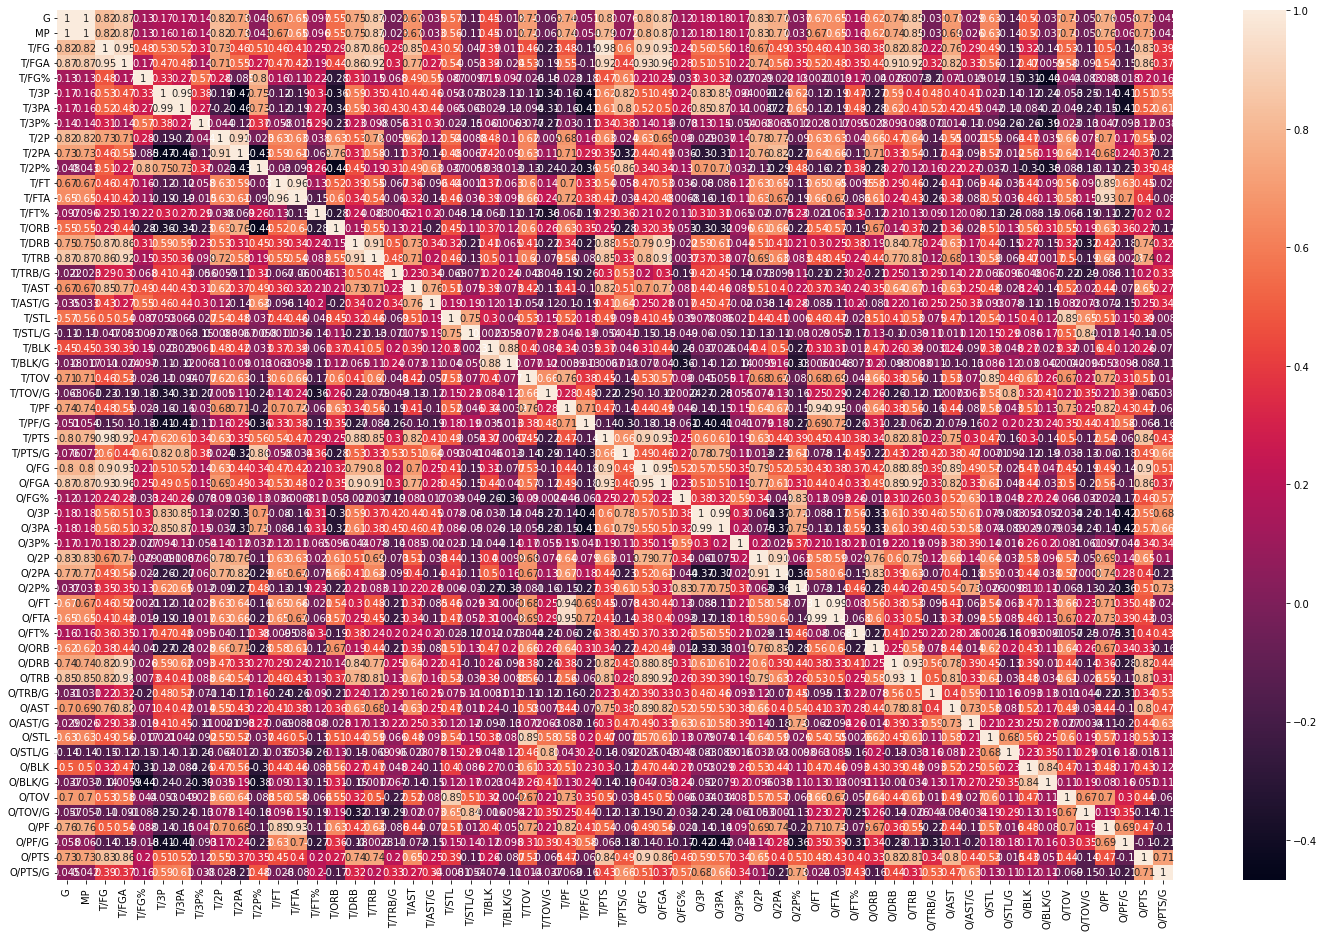

In [47]:
#show a heatmap
correlation= df_nba.corr()
plt.figure(figsize=(25,16)) 
sns.heatmap(correlation,annot=True)
plt.show()

This initial heatmap is overwhelming. To better focus on how teams perform on a game-by-game basis and make the heatmap easier to understand, we will be dropping several redeundant variables regardless of correlation scores. Additionally, we are afraid that because some NBA seasons did not have the standard 82 games, the variables that show totals may skew the data and thus predictions in certain cases.

The lst of variables includes: G, MP, as well as both the "T/*" and "O/*" variations of FG, FGA, 3P, 3PA, 2P, 2PA, FT, FTA, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS.

In [48]:
#drop redundant variables
df_nba.drop(['G','MP','T/FG','T/FGA','T/3P','T/3PA','T/2P','T/2PA','T/FT','T/FTA','T/ORB','T/DRB','T/TRB','T/AST','T/STL','T/BLK','T/TOV',
             'T/PF','T/PTS','O/FG','O/FGA','O/3P','O/3PA','O/2P','O/2PA','O/FT','O/FTA','O/ORB','O/DRB','O/TRB','O/AST','O/STL','O/BLK',
             'O/TOV','O/PF','O/PTS'], axis=1, inplace=True)

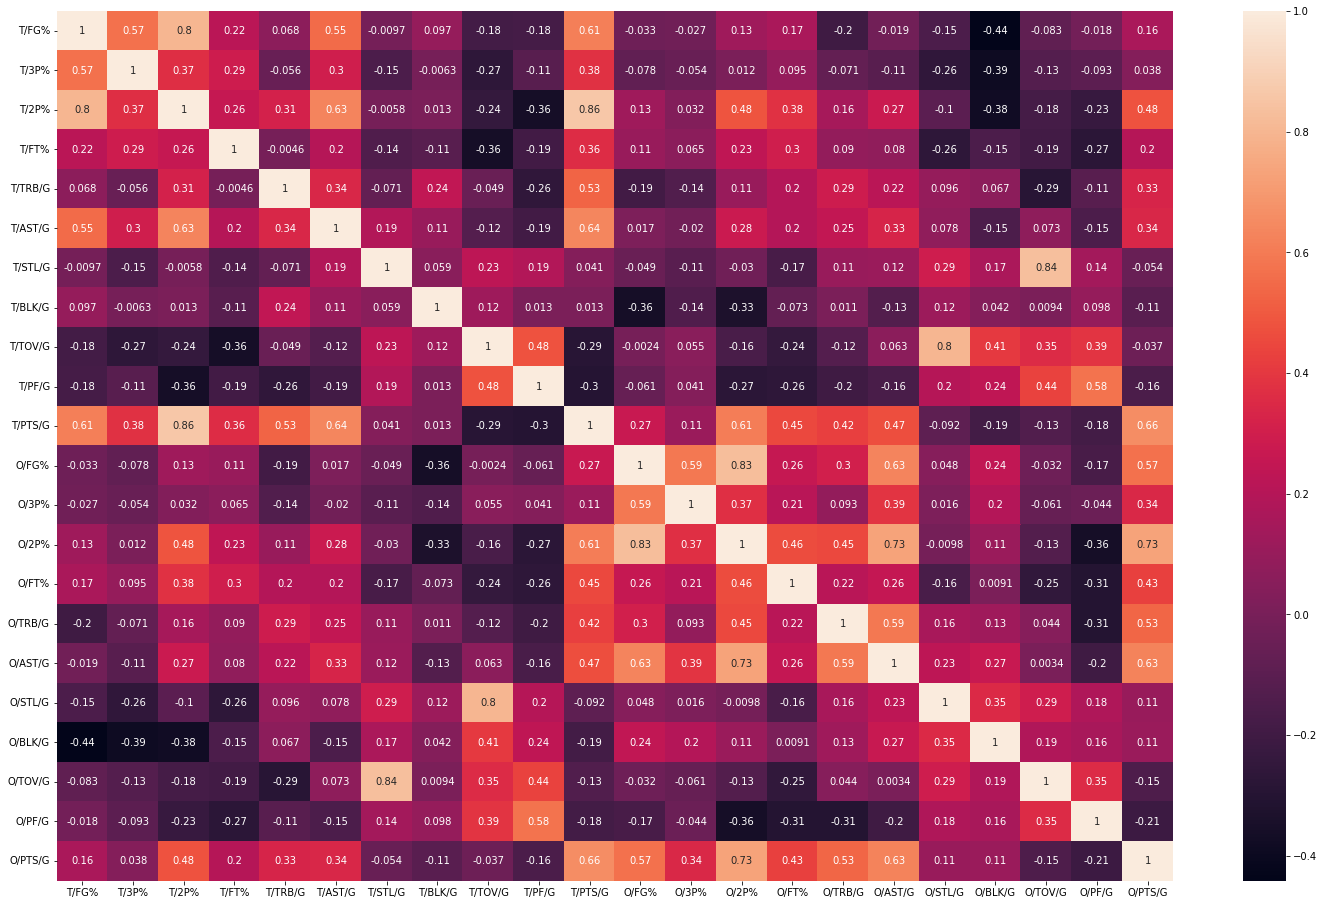

In [49]:
#display the new heatmap
correlation= df_nba.corr()
plt.figure(figsize=(25,16)) 
sns.heatmap(correlation,annot=True)
plt.show()

In [50]:
#drop everything over .68
df_nba.drop(['T/2P%','O/2P%','O/STL/G','O/TOV/G', 'Team', 'Season'], axis=1, inplace=True)
df_nba.head()

,Playoffs,T/FG%,T/3P%,T/FT%,T/TRB/G,T/AST/G,T/STL/G,T/BLK/G,T/TOV/G,T/PF/G,T/PTS/G,O/FG%,O/3P%,O/FT%,O/TRB/G,O/AST/G,O/BLK/G,O/PF/G,O/PTS/G
0,Made Playoffs,0.478,0.403,0.746,44.609756,24.792683,9.085366,4.207317,14.329268,22.036585,105.182927,0.448,0.350,0.717,38.012195,19.414634,3.804878,22.634146,92.939024
1,Made Playoffs,0.480,0.364,0.760,41.500000,24.378049,10.756098,4.792683,17.573171,23.987805,104.536585,0.438,0.348,0.716,40.597561,21.658537,4.768293,24.512195,96.743902
2,Made Playoffs,0.482,0.378,0.691,41.060976,25.365854,8.085366,4.951220,14.146341,20.841463,104.524390,0.454,0.366,0.736,42.097561,22.792683,3.951220,22.280488,98.963415
3,Made Playoffs,0.473,0.332,0.771,42.804878,24.402439,7.597561,4.036585,14.719512,21.658537,104.292683,0.471,0.369,0.739,41.280488,25.463415,5.121951,24.524390,103.963415
4,Missed Playoffs,0.456,0.371,0.714,42.402439,21.853659,7.963415,4.951220,15.878049,24.890244,103.597561,0.481,0.357,0.747,44.268293,23.365854,5.963415,23.963415,107.000000


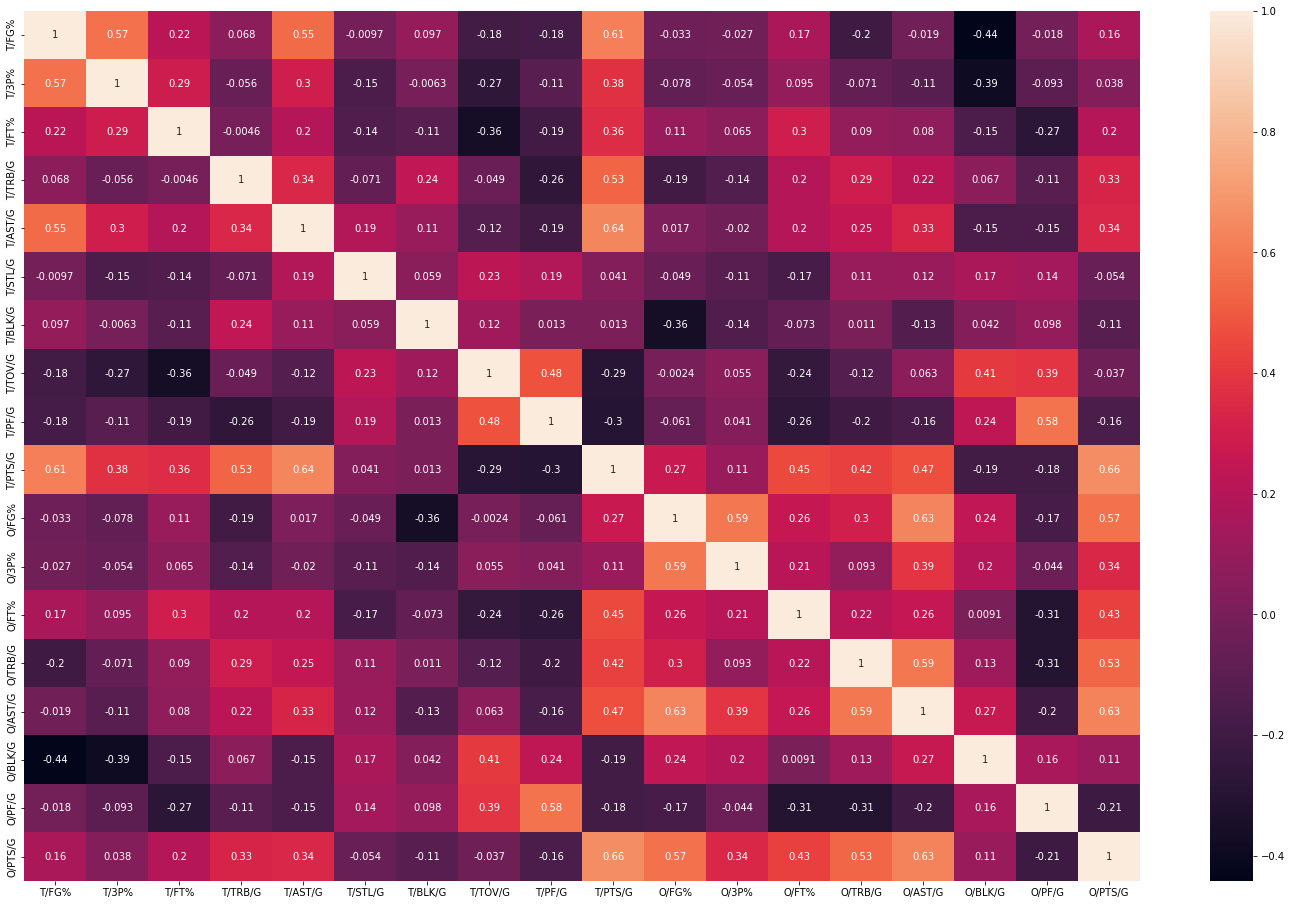

In [51]:
correlation= df_nba.corr()
plt.figure(figsize=(25,16)) 
sns.heatmap(correlation,annot=True)
plt.show()

In [52]:
X = df_nba.drop('Playoffs', axis = 1)

In [53]:
y = df_nba['Playoffs']

In [54]:
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size =0.2 , random_state = 0)

In [55]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_ypred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [56]:
# Classification Report using confusion matrix
def plot_confusionmatrix(y_train_pred,y_train,dom, classes):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

                 precision    recall  f1-score   support

  Made Playoffs       0.87      0.88      0.88        84
Missed Playoffs       0.87      0.86      0.86        77

       accuracy                           0.87       161
      macro avg       0.87      0.87      0.87       161
   weighted avg       0.87      0.87      0.87       161

Test Confusion matrix


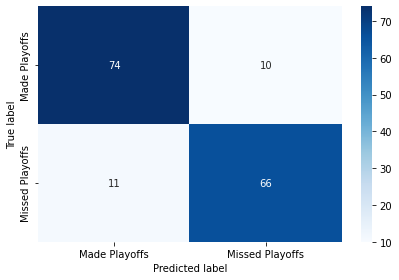

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


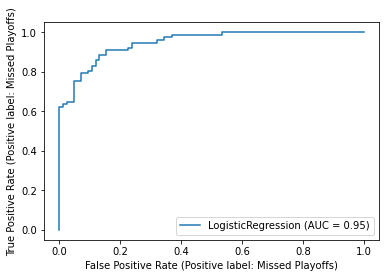

In [57]:
classes =['Made Playoffs', 'Missed Playoffs']
print(classification_report(y_test, lr_ypred))
plot_confusionmatrix(lr_ypred,y_test,dom='Test', classes=classes)
plot_roc_curve(lr, X_test, y_test)

In [58]:
tree_model = DecisionTreeClassifier(criterion="gini")
tree_model.fit(X_train ,y_train )
tree_ypred = tree_model.predict(X_test)

                 precision    recall  f1-score   support

  Made Playoffs       0.78      0.81      0.80        84
Missed Playoffs       0.78      0.75      0.77        77

       accuracy                           0.78       161
      macro avg       0.78      0.78      0.78       161
   weighted avg       0.78      0.78      0.78       161

Test Confusion matrix


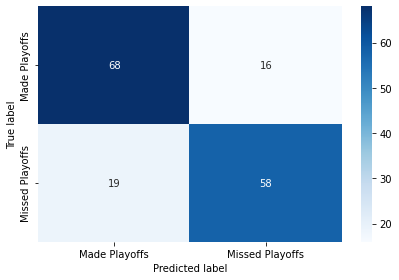

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


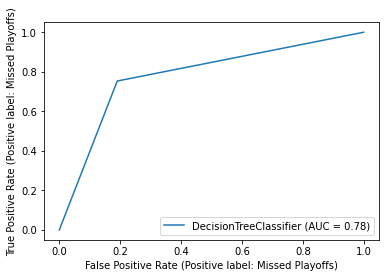

In [59]:
classes =['Made Playoffs', 'Missed Playoffs']
print(classification_report(y_test, tree_ypred))
plot_confusionmatrix(tree_ypred,y_test,dom='Test', classes=classes)
plot_roc_curve(tree_model, X_test, y_test)

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)

                 precision    recall  f1-score   support

  Made Playoffs       0.82      0.88      0.85        84
Missed Playoffs       0.86      0.79      0.82        77

       accuracy                           0.84       161
      macro avg       0.84      0.84      0.84       161
   weighted avg       0.84      0.84      0.84       161

Test Confusion matrix


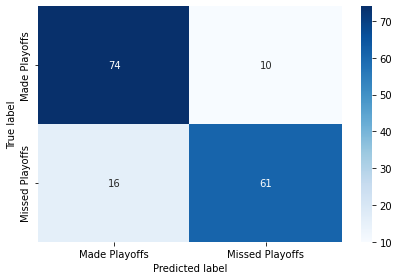

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


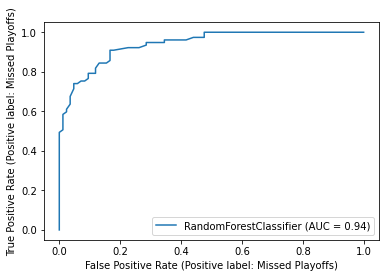

In [61]:
classes =['Made Playoffs', 'Missed Playoffs']
print(classification_report(y_test, rf_ypred))
plot_confusionmatrix(rf_ypred,y_test,dom='Test', classes=classes)
plot_roc_curve(rf, X_test, y_test)

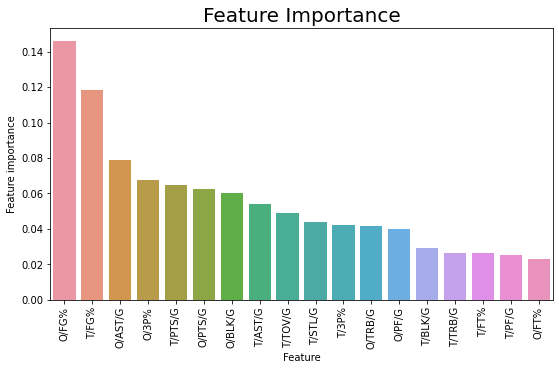

In [62]:
features = ["T/FG%","T/3P%","T/FT%","T/TRB/G","T/AST/G", "T/STL/G", "T/BLK/G", "T/TOV/G","T/PF/G", "T/PTS/G","O/FG%","O/3P%",
            "O/FT%","O/TRB/G", "O/AST/G","O/BLK/G", "O/PF/G","O/PTS/G"]
plt.figure(figsize = (9,5))
feat_import = pd.DataFrame({'Feature': features, 'Feature importance': 
rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)
g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Feature Importance',fontsize=20)
plt.show()

In [63]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Playoffs  801 non-null    object 
 1   T/FG%     801 non-null    float64
 2   T/3P%     801 non-null    float64
 3   T/FT%     801 non-null    float64
 4   T/TRB/G   801 non-null    float64
 5   T/AST/G   801 non-null    float64
 6   T/STL/G   801 non-null    float64
 7   T/BLK/G   801 non-null    float64
 8   T/TOV/G   801 non-null    float64
 9   T/PF/G    801 non-null    float64
 10  T/PTS/G   801 non-null    float64
 11  O/FG%     801 non-null    float64
 12  O/3P%     801 non-null    float64
 13  O/FT%     801 non-null    float64
 14  O/TRB/G   801 non-null    float64
 15  O/AST/G   801 non-null    float64
 16  O/BLK/G   801 non-null    float64
 17  O/PF/G    801 non-null    float64
 18  O/PTS/G   801 non-null    float64
dtypes: float64(18), object(1)
memory usage: 119.0+ KB


In [64]:
df_nba.shape

(801, 19)

In [ ]:
df_nba2 = df_nba
df_nba2['Playoffs'].loc[df_nba2['Playoffs'] == 'Missed Playoffs'] = 0
df_nba2['Playoffs'].loc[df_nba2['Playoffs'] == 'Made Playoffs'] = 1

In [70]:
df_nba2.head(5)

,Playoffs,T/FG%,T/3P%,T/FT%,T/TRB/G,T/AST/G,T/STL/G,T/BLK/G,T/TOV/G,T/PF/G,T/PTS/G,O/FG%,O/3P%,O/FT%,O/TRB/G,O/AST/G,O/BLK/G,O/PF/G,O/PTS/G
0,1,0.478,0.403,0.746,44.609756,24.792683,9.085366,4.207317,14.329268,22.036585,105.182927,0.448,0.350,0.717,38.012195,19.414634,3.804878,22.634146,92.939024
1,1,0.480,0.364,0.760,41.500000,24.378049,10.756098,4.792683,17.573171,23.987805,104.536585,0.438,0.348,0.716,40.597561,21.658537,4.768293,24.512195,96.743902
2,1,0.482,0.378,0.691,41.060976,25.365854,8.085366,4.951220,14.146341,20.841463,104.524390,0.454,0.366,0.736,42.097561,22.792683,3.951220,22.280488,98.963415
3,1,0.473,0.332,0.771,42.804878,24.402439,7.597561,4.036585,14.719512,21.658537,104.292683,0.471,0.369,0.739,41.280488,25.463415,5.121951,24.524390,103.963415
4,0,0.456,0.371,0.714,42.402439,21.853659,7.963415,4.951220,15.878049,24.890244,103.597561,0.481,0.357,0.747,44.268293,23.365854,5.963415,23.963415,107.000000


In [71]:
X2 = df_nba2.drop('Playoffs', axis = 1)
y2 = df_nba2['Playoffs']

In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

RMSE: 0.35
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        76
           1       0.87      0.89      0.88        85

    accuracy                           0.88       161
   macro avg       0.88      0.87      0.88       161
weighted avg       0.88      0.88      0.88       161

Test Confusion matrix


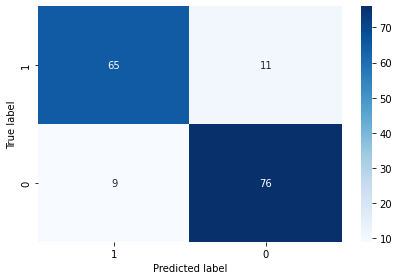

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


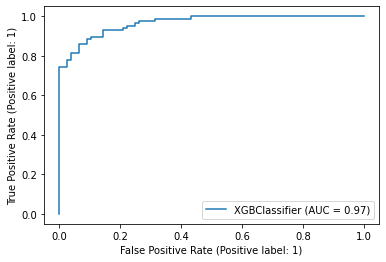

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
import numpy as np
xgb = xgb.XGBClassifier(objective='binary:logistic',
                        learning_rate=0.3,
                        max_depth=6,
                        n_estimators= 100,
                        subsample=1,
                        colsample_bytree=1)

xgb.fit(X_train2, y_train2)

xgb_ypred = xgb.predict(X_test2)
mse = mean_squared_error(y_test2, xgb_ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

eval_set = [(X_test2, y_test2)]
#xgb.fit(X_train2, 
#        y_train2,
#        early_stopping_rounds=10,
#        eval_set=eval_set) 
#xgb_ytrain_pred = xgb.predict_proba(X_train2)[:,1]
#xgb_ytest_pred = xgb.predict_proba(X_test2)[:,1]
#print("AUC Train: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_train,xgb_ytrain_pred),
#                                                   roc_auc_score(y_test,xgb_ytest_pred)))

#print(type(y_test2))

y_test2=y_test2.astype("category")
xgb_ypred=xgb_ypred.astype("int")

np.unique(y_test2)
np.unique(xgb_ypred)
y_test2.astype("category")


classes =['1', '0']
print(classification_report(y_test2, xgb_ypred))
plot_confusionmatrix(xgb_ypred,y_test2,dom='Test', classes=classes)
plot_roc_curve(xgb, X_test2, y_test2)
#plot_roc_curve(xgb, X_train2, y_train2.astype("category"))
